# Experimentación de dos variables

## Importando bibliotecas
- <b>Pandas</b>: Nos sirve para leer datos y filtrarlos.
- <b>Seaborn</b>: Es una biblioteca para graficar que nos permite interactuar con datos de Pandas.

- <i>Numpy y Matplotlib son dependencias de Pandas.</i>


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Leyendo resultados
Primero, leemos el archivo de resultados de ejecución de bt. Para esto, vamos a abrirlo con Pandas y guardarlo en un DataFrame (df).

In [2]:
df = pd.read_csv("tp2l/complejidades_treePR_fijo.csv")
df['t'] = df['tiempo']
print(df)

    fila  columna      tiempo           t
0      2        2    0.018333    0.018333
1      2       52    0.312640    0.312640
2      2      102    0.588904    0.588904
3      2      152    0.916384    0.916384
4      2      202    1.107310    1.107310
5      2      302    1.716200    1.716200
6      2      402    2.106410    2.106410
7      2      502    2.921770    2.921770
8     52        2    0.182200    0.182200
9     52       52    6.536250    6.536250
10    52      102   12.761500   12.761500
11    52      152   16.871400   16.871400
12    52      202   25.259700   25.259700
13    52      302   33.454300   33.454300
14    52      402   50.174000   50.174000
15    52      502   58.503300   58.503300
16   102        2    0.342948    0.342948
17   102       52   12.613800   12.613800
18   102      102   24.862000   24.862000
19   102      152   33.010100   33.010100
20   102      202   49.357600   49.357600
21   102      302   65.850300   65.850300
22   102      402   98.641500   98

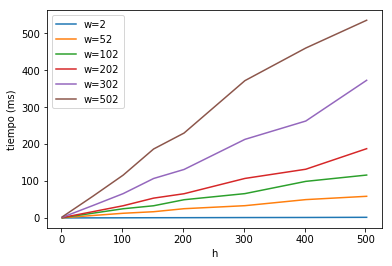

In [3]:
# Graficamos el tiempo en función de n, con series variando m.
ax1 = sns.lineplot(x="fila", y="tiempo", data=df.loc[df['columna'] == 2]);
ax1 = sns.lineplot(x="fila", y="tiempo", data=df.loc[df['columna'] == 52]);
ax1 = sns.lineplot(x="fila", y="tiempo", data=df.loc[df['columna'] == 102]);
ax1 = sns.lineplot(x="fila", y="tiempo", data=df.loc[df['columna'] == 152]);
ax1 = sns.lineplot(x="fila", y="tiempo", data=df.loc[df['columna'] == 302]);
ax1 = sns.lineplot(x="fila", y="tiempo", data=df.loc[df['columna'] == 502]);
ax1.legend(["w=2", "w=52", "w=102", "w=202" , "w=302" , "w=502" , ]);
plt.ylabel("tiempo (ms)");
plt.xlabel("h");

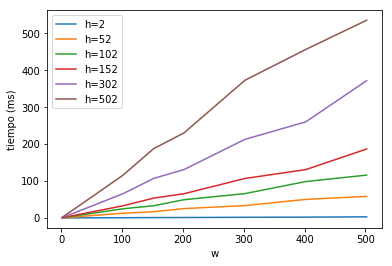

In [4]:
# Graficamos el tiempo en función de m, con series variando n.
ax1 = sns.lineplot(x="columna", y="tiempo", data=df.loc[df['fila'] == 2]);
ax1 = sns.lineplot(x="columna", y="tiempo", data=df.loc[df['fila'] == 52]);
ax1 = sns.lineplot(x="columna", y="tiempo", data=df.loc[df['fila'] == 102]);
ax1 = sns.lineplot(x="columna", y="tiempo", data=df.loc[df['fila'] == 152]);
ax1 = sns.lineplot(x="columna", y="tiempo", data=df.loc[df['fila'] == 302]);
ax1 = sns.lineplot(x="columna", y="tiempo", data=df.loc[df['fila'] == 502]);
ax1.legend(["h=2", "h=52", "h=102" , "h=152", "h=302", "h=502"]);
plt.ylabel("tiempo (ms)");
plt.xlabel("w");

Al igual que en $meet$-$in$-$the$-$middle$, y como mencionamos en el gráfico anterior, notamos un comportamiento errático para un mismo $n$ con distintos $W$. Esto refuerza nuestra hipótesis del párrafo anterior, por lo que utilizaremos la experimentación descrita para corroborarla o refutarla.

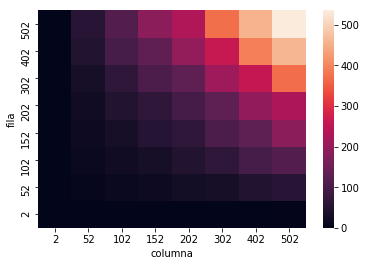

In [5]:
heat_df = df.pivot("fila", "columna", "t");
ax = sns.heatmap(heat_df)
ax.invert_yaxis()

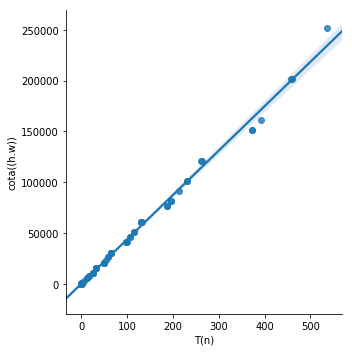

In [6]:
df["cota"] =((df["fila"]) * (df["columna"]));
# Grafico correlación.
ax1 = sns.lmplot(x='tiempo', y='cota', data=df);
plt.xlabel("T(n)");
plt.ylabel("cota((h.w))");

In [7]:
df2 = df
r = np.corrcoef(df2["t"], df2["cota"])[0, 1];
print("El coeficiente de correlación de Pearson es: r="+str(r))

El coeficiente de correlación de Pearson es: r=0.9975947895307227
